In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_file_path = r"E:\ineuron\vs\projects\Forest_Cover_Type_Prediction\forestcover\artifact\data_ingestion\2022-07-24-12-00-53\raw_data\covtype.csv"

In [3]:
df = pd.read_csv(train_file_path)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Text(0.5, 0, 'Cover Type')

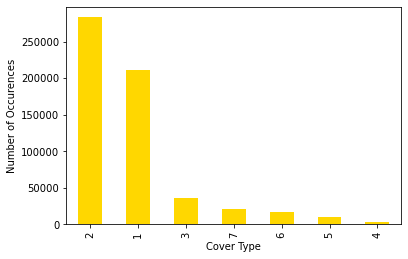

In [4]:
# How many samples of each cover type are there?

df["Cover_Type"].value_counts().plot(kind='bar',color='gold')
plt.ylabel("Number of Occurences")
plt.xlabel("Cover Type")

##### Inferences:
* More records have a Cover_Type=1(Spruce/Fir) and Cover_Type=2(Lodgepole Pine)
* KNN will not work here as its an imbalanced data

In [5]:
# Extract column names from the dataset
col_names = df.columns.tolist()

###### We will check properties of the conitnuous variables first and later the categorical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

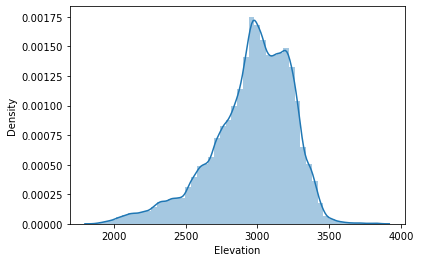

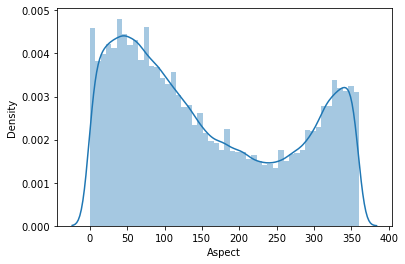

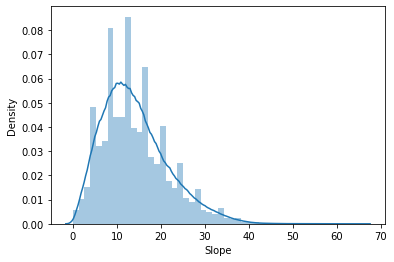

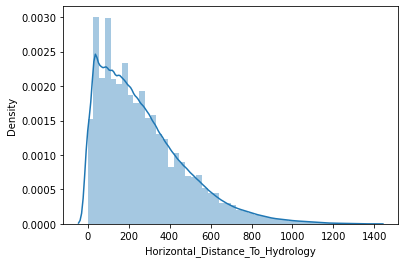

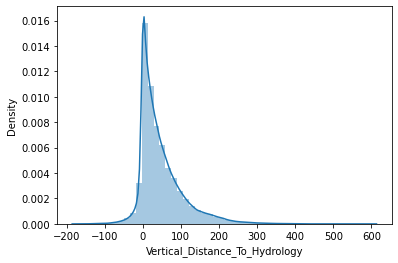

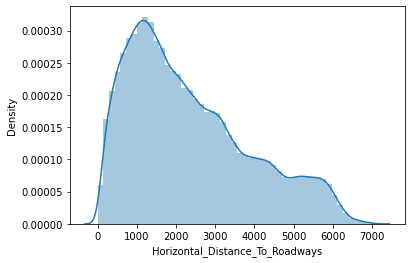

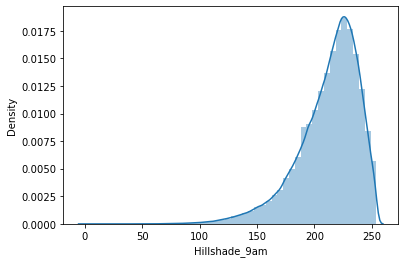

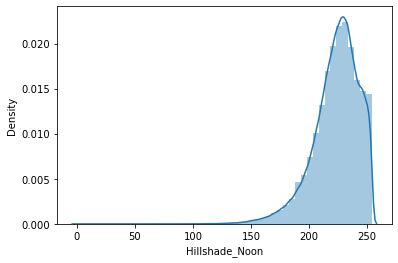

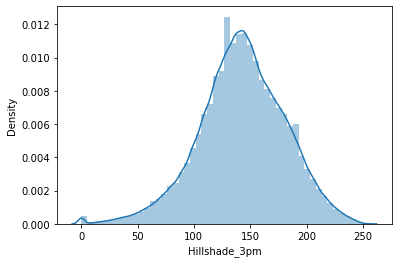

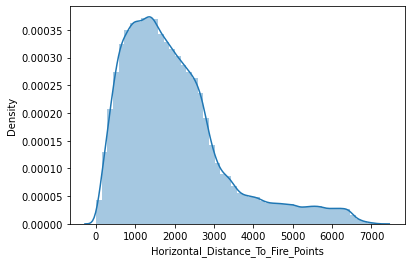

In [6]:
for name in col_names:
    if name[0:4] != 'Soil' and name[0:4] != 'Wild' and name != 'Cover_Type':
        plt.figure()
        sns.distplot(df[name]);

##### Inferences:
* Since the continuous features are heavily skewed, normalisation will help

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

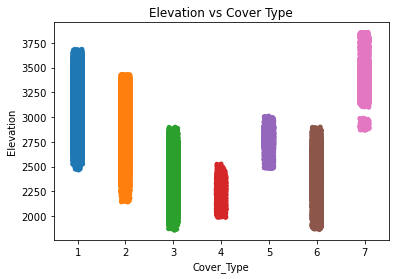

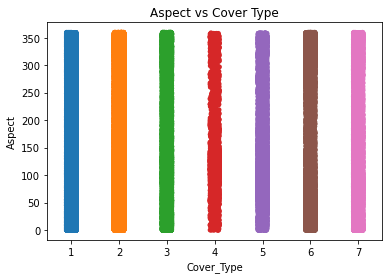

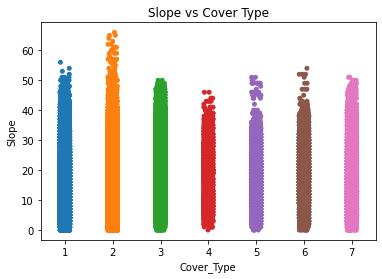

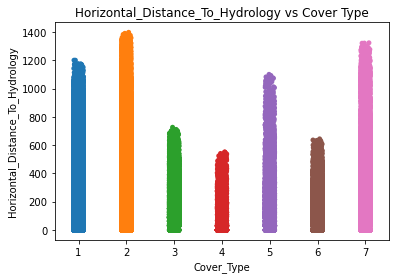

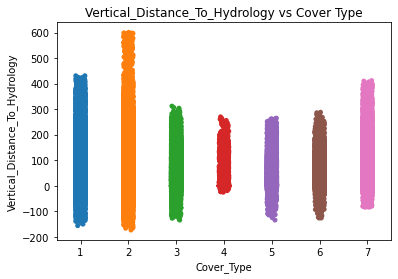

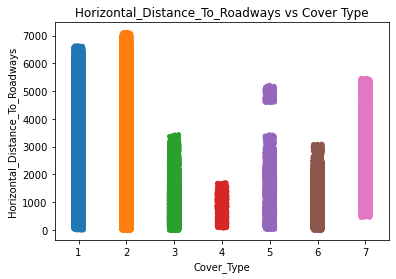

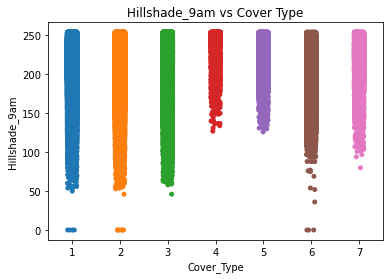

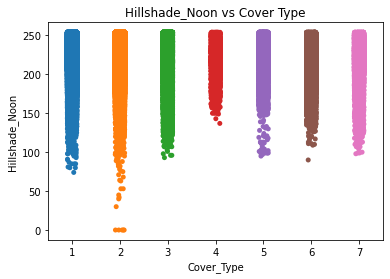

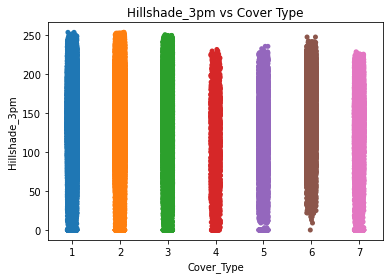

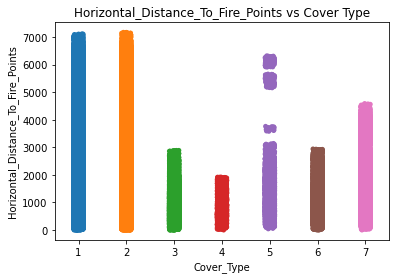

In [7]:
for name in col_names:
    if name[0:4] != 'Soil' and name[0:4] != 'Wild' and name != 'Cover_Type':
        title = name + ' vs Cover Type'
        plt.figure()
        sns.stripplot(df["Cover_Type"],df[name],jitter=True)
        plt.title(title);

##### Inferences:
* Slope, aspect and Hillshade_3pm seem to be identical across cover types, offering almost no discrimination value.

In [8]:
numerical_non_range_columns = df.iloc[:,:10]

In [9]:
numerical_range_columns = df.iloc[:,10:]

##### Now we will normalise the continuous features

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled = scaler.fit_transform(numerical_non_range_columns)

In [13]:
print(scaled)

[[0.36868434 0.14166667 0.04545455 ... 0.91338583 0.58267717 0.87536596]
 [0.36568284 0.15555556 0.03030303 ... 0.92519685 0.59448819 0.86783772]
 [0.47273637 0.38611111 0.13636364 ... 0.93700787 0.53149606 0.85333891]
 ...
 [0.26363182 0.44166667 0.25757576 ... 0.9488189  0.51181102 0.11905758]
 [0.26263132 0.47222222 0.22727273 ... 0.96456693 0.56299213 0.12045169]
 [0.26213107 0.45833333 0.1969697  ... 0.96062992 0.55511811 0.12198522]]


##### We will check correlation in the variables now

In [14]:
vars = [x for x in df.columns.tolist() if "Soil_Type" not in x]
vars = [x for x in vars if "Wilderness" not in x]
df1 = df.reindex(columns=vars)

<AxesSubplot:>

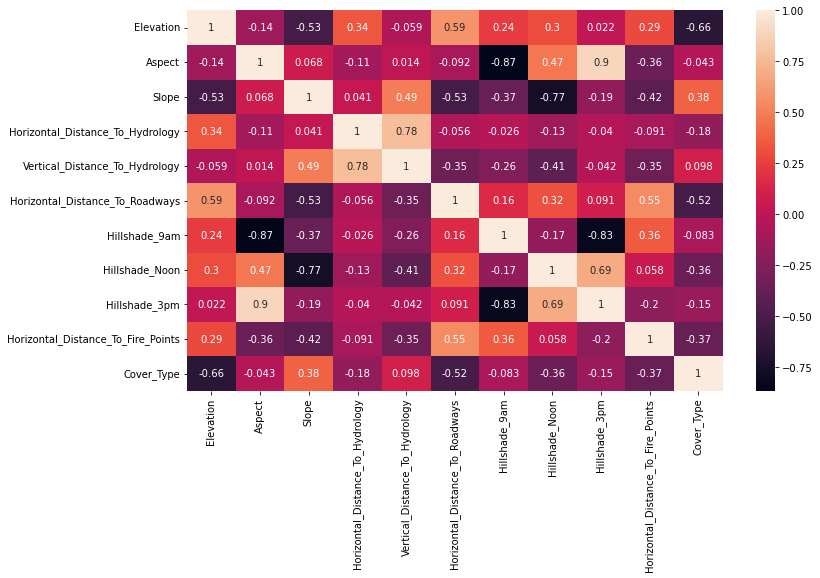

In [15]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat.corr(), annot=True)

##### Inferences:
* No major correlation between the continuous variables, so no need to drop any column



##### Lets see if pairs of variables can give us some discrimination between the cover types. For this analysis, I am excluding Slope, Aspect and Hillshade_3pm, since we saw earlier that they were almost similar across cover types.


In [16]:
# So which variables are we plotting?
vars = df1.columns.tolist()
remove_cols = ['Slope', 'Aspect', 'Hillshade_3pm', 'Cover_Type']
vars = [x for x in vars if x not in remove_cols]
vars

['Elevation',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

g = sns.pairplot(df, vars=vars, hue="Cover_Type")

##### We will check the Wilderness variables now

In [17]:
col_names_wilderness = [x for x in df.columns.tolist() if "Wilderness" in x]

In [18]:
types_sum = df[col_names_wilderness].groupby(df['Cover_Type']).sum()

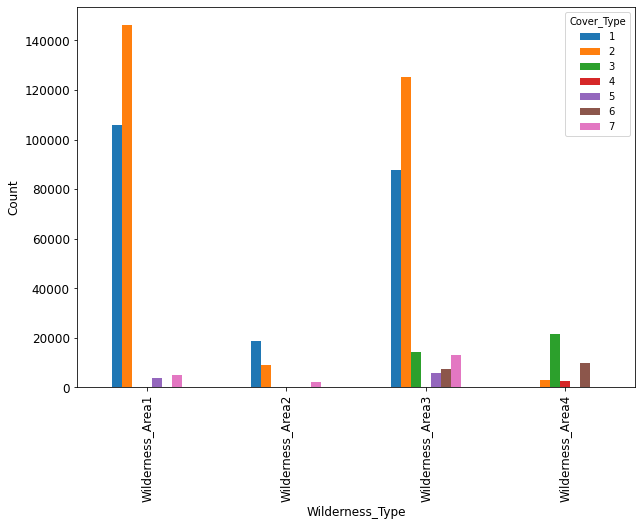

In [22]:
ax = types_sum.T.plot(kind='bar', figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel("Wilderness_Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

##### Inferences:
* Wilderness_Area2 has very few samples
* Wilderness_Area2 has only Cover_Type 1, 2 & 7
* Cover_Type 6 is only present in Wilderness_Area 3 & 4

##### Now checking soil types

In [24]:
# How many of each Soil_Type are there?
A = np.array(col_names)
soil_types = [item for item in A if "Soil" in item]
for soil_type in soil_types:
    print (soil_type, df[soil_type].sum())

Soil_Type1 3031
Soil_Type2 7525
Soil_Type3 4823
Soil_Type4 12396
Soil_Type5 1597
Soil_Type6 6575
Soil_Type7 105
Soil_Type8 179
Soil_Type9 1147
Soil_Type10 32634
Soil_Type11 12410
Soil_Type12 29971
Soil_Type13 17431
Soil_Type14 599
Soil_Type15 3
Soil_Type16 2845
Soil_Type17 3422
Soil_Type18 1899
Soil_Type19 4021
Soil_Type20 9259
Soil_Type21 838
Soil_Type22 33373
Soil_Type23 57752
Soil_Type24 21278
Soil_Type25 474
Soil_Type26 2589
Soil_Type27 1086
Soil_Type28 946
Soil_Type29 115247
Soil_Type30 30170
Soil_Type31 25666
Soil_Type32 52519
Soil_Type33 45154
Soil_Type34 1611
Soil_Type35 1891
Soil_Type36 119
Soil_Type37 298
Soil_Type38 15573
Soil_Type39 13806
Soil_Type40 8750


##### Inferences:
* Soil_Type15 has bery few samples
* All soil types are present

##### Final Inferences:
* We are not dropping any columns from the dataset as multicollinearity is not found
* All categorical columns also have values so we cannot drop any of them
* We will do only mean imputing on the numerical columns and do MinMaxScaler to convert them to Normal Distribution
* We will do only "most_frequent" imputing on the categorical columns